#  **Major Project Solution By Shubham**

  Spark Funds Investments Analysis Project 

Project Description:

You work for Spark Funds, an asset management company. Spark Funds wants to make 
investments in a few companies. The CEO of Spark Funds wants to understand the global 
trends in investments so that she can take the investment decisions effectively.


Spark Funds has two minor constraints for investments:
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of 
communication with the companies it would invest in



Spark Funds wants to invest where most other investors are investing. This pattern is often 
observed among early stage startup investors.


What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.


1. Business objective:

The objective is to identify the best sectors, countries, and a 
suitable investment type for making investments. The overall strategy is to invest where 
others are investing, implying that the 'best' sectors and countries are the ones 'where 
most investors are investing'.


2. Goals of data analysis: Your goals are divided into three sub-goals:

Investment type analysis:

Comparing the typical investment amounts in the 
venture, seed, angel, private equity etc. so that Spark Funds can choose the type 
that is best suited for their strategy.


Country analysis: 

Identifying the countries which have been the most heavily 
invested in the past. These will be Spark Funds’ favourites as well.


Sector analysis:  

Understanding the distribution of investments across the eight 
main sectors. (Note that we are interested in the eight 'main sectors' provided in 
the mapping file. The two files — companies and rounds2 — have numerous 
sub-sector names; hence, you will need to map each sub-sector to its main 
sector).


 .
 
 
 **For the analysis we have to import some Python Libraries.** 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

Now we have to look our data given in .csv files 

In [4]:
companies=pd.read_csv('companies.csv',encoding='latin1')

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies[companies['category_list']=='A0lytics']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [6]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Infotrieve,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
rounds2=pd.read_csv('rounds2.csv',encoding='latin1')

rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
mapping=pd.read_csv('mapping.csv',encoding='latin1')

mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [10]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


**We have to filter our data because data contains special characters** 

- removing special characters contains in 'permalink' & 'name' columns in companies data frame

In [11]:
companies['permalink']=companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['permalink']=companies['permalink'].str.replace('[#,@,&,:]', '')
companies['permalink']=companies['permalink'].str.lower()
companies['permalink']

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                   /organization/eron
66366                                 /organization/asys-2
66367    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: permalink, Length: 66368, dtype: object

In [12]:
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore').str.replace('[#,@,&,-,:]', '')
#companies['name']=companies['name'].str.replace('[#,@,&,-,:]', '')
companies['name']=companies['name'].str.lower()
companies['name']

0                                           fame
1                                        qounter
2                          (the) one of theminc.
3                                        0-6.com
4                               004 technologies
                          ...                   
66363              zznode science and technology
66364                      zzzzapp wireless ltd.
66365                                       eron
66366                                       asys
66367    novatiff reklam ve tantm hizmetleri tic
Name: name, Length: 66368, dtype: object

In [13]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


- removing special characters contains in 'company_permalink' & 'funding_round_permalink' columns in rounds2 data frame

In [14]:
rounds2['company_permalink']=rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()
rounds2['funding_round_permalink']=rounds2['funding_round_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')

rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


**How many unique companies are present in rounds2?**

In [15]:
rounds2['company_permalink'].nunique()

66368

**How many unique companies are present in the companies file?**

In [16]:
companies['permalink'].nunique()

66368

**In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.**

*permalink column can be used as the  unique key for each company*


.

**Are there any companies in the rounds2 file which are not  present in companies ?**

In [17]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


**Answer is No**

.

***Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?***

***Ans is 114949***

# 

**Mergeing the rounds2 and companies data frame**

In [18]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on=['company_permalink'], right_on=['permalink'])
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [19]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

**Finding how many NULL or NaN values are present in merge_frame data frame**

In [20]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

- Removing NULL or NaN values are present in 'raised_amount_usd' column in master_frame

In [21]:
master_frame1 = master_frame[master_frame['raised_amount_usd'].notnull()]
master_frame1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [22]:
master_frame1.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

# 

**Average funding amount of venture type**

In [23]:
(master_frame1[master_frame1['funding_round_type']=='venture']['raised_amount_usd'].mean())/1000000

11.748949129489528

**Average funding amount of angel type**

In [24]:
(master_frame1[master_frame1['funding_round_type']=='angel']['raised_amount_usd'].mean())/1000000

0.9586944697530865

**Average funding amount of seed type**

In [25]:
(master_frame1[master_frame1['funding_round_type']=='seed']['raised_amount_usd'].mean())/1000000

0.7198179969071729

**Average funding amount of private equity type**

In [26]:
(master_frame1[master_frame1['funding_round_type']=='private_equity']['raised_amount_usd'].mean())/1000000

73.30859302944215

In [27]:
(master_frame1.groupby('funding_round_type')['raised_amount_usd'].mean())/1000000 

funding_round_type
angel                      0.958694
convertible_note           1.453439
debt_financing            17.043526
equity_crowdfunding        0.538368
grant                      4.300576
non_equity_assistance      0.411203
post_ipo_debt            168.704572
post_ipo_equity           82.182494
private_equity            73.308593
product_crowdfunding       1.363131
secondary_market          79.649630
seed                       0.719818
undisclosed               19.242370
venture                   11.748949
Name: raised_amount_usd, dtype: float64

In [28]:
(master_frame1.groupby('funding_round_type')['raised_amount_usd'].median())/1000000

funding_round_type
angel                     0.400000
convertible_note          0.272000
debt_financing            1.100000
equity_crowdfunding       0.100000
grant                     0.201684
non_equity_assistance     0.060000
post_ipo_debt            19.950000
post_ipo_equity          12.262852
private_equity           20.000000
product_crowdfunding      0.183915
secondary_market         32.600000
seed                      0.275000
undisclosed               1.018680
venture                   5.000000
Name: raised_amount_usd, dtype: float64

In [29]:
mf1=master_frame1[master_frame1['funding_round_type']=='venture']
mf2=master_frame1[master_frame1['funding_round_type']=='angel']
mf3=master_frame1[master_frame1['funding_round_type']=='seed']
mf4=master_frame1[master_frame1['funding_round_type']=='private_equity']
mf=pd.concat([mf1, mf2, mf3, mf4])

<AxesSubplot:>

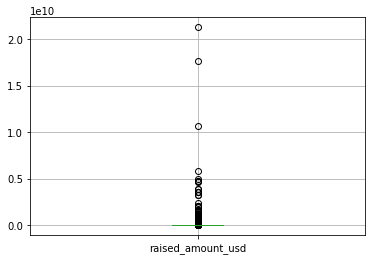

In [30]:
master_frame1.boxplot()

In [31]:
mf

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114275,/organization/zimride,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,NaN,30-01-2013,15000000.0,/organization/zimride,zimride,http://zimride.com,Public Transportation,acquired,USA,CA,SF Bay Area,San Francisco,NaN
114406,/organization/ziptel,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,NaN,10-11-2014,4319243.0,/organization/ziptel,ziptel,http://ziptel.com.au,Communications Hardware|Telecommunications|Wir...,ipo,AUS,8,Perth,Subiaco,NaN
114644,/organization/zoot-2,/funding-round/08888e5fa1a9ceac73f993e342866a63,private_equity,NaN,21-01-2015,6.0,/organization/zoot-2,zoot,http://www.zoot.cz/,E-Commerce|Fashion|Lifestyle,closed,NaN,NaN,NaN,NaN,01-09-2012
114882,/organization/zyme-solutions,/funding-round/b2cfedffee4860384ce7293a6e8db5da,private_equity,NaN,20-05-2013,5000000.0,/organization/zyme-solutions,zyme solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004


<AxesSubplot:>

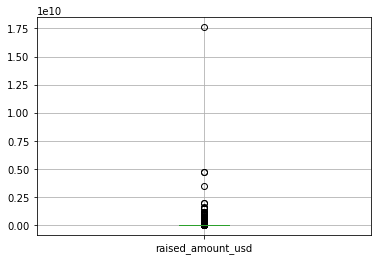

In [32]:
mf.boxplot()

- **By the above box plot of 'raised_amount_usd' we come to know that there are outliners which we have to filter out for further analysis**

In [33]:
mf['funding_round_type'].unique()

array(['venture', 'angel', 'seed', 'private_equity'], dtype=object)

In [34]:
#mf=mf.reset_index(drop=True)
mf.count()

company_permalink          80627
funding_round_permalink    80627
funding_round_type         80627
funding_round_code         28153
funded_at                  80627
raised_amount_usd          80627
permalink                  80627
name                       80626
homepage_url               77182
category_list              79772
status                     80627
country_code               75606
state_code                 74055
region                     74564
city                       74567
founded_at                 67181
dtype: int64

In [35]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mf.describe()

,raised_amount_usd
count,80627.00
mean,9347994.74
std,75629397.45
min,0.00
25%,400000.00
50%,2000000.00
75%,7975495.50
max,17600000000.00


In [36]:
print(mf["raised_amount_usd"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

0.00             0.00
0.10         75000.00
0.20        250000.00
0.30        575000.00
0.40       1094007.60
0.50       2000000.00
0.60       3470418.80
0.70       6000000.00
0.80      10000000.00
0.90      20000000.00
1.00   17600000000.00
Name: raised_amount_usd, dtype: float64


In [37]:
print(mf["raised_amount_usd"].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,00.8,0.09,.1]))

0.00          0.00
0.01      10000.00
0.02      17983.68
0.03      20000.00
0.04      25000.00
0.05      30000.00
0.06      40000.00
0.07      43856.30
0.80   10000000.00
0.09      56426.86
0.10      75000.00
Name: raised_amount_usd, dtype: float64


In [38]:
print(mf["raised_amount_usd"].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]))

0.90      20000000.00
0.91      21000000.00
0.92      24000000.00
0.93      25000000.00
0.94      30000000.00
0.95      33000000.00
0.96      40000000.00
0.97      49000000.00
0.98      60000000.00
0.99     100000000.00
1.00   17600000000.00
Name: raised_amount_usd, dtype: float64


In [39]:
mf[mf['raised_amount_usd'] == 17600000000.00]['name']

37569    freescale semiconductor
Name: name, dtype: object

.

**From internet searches we find that these extreme value investments are real so as to include them in our insights we won't drop them. However we remove investments below 10000 usd as they do not make much business sense with our objectives.**

.

In [40]:
mf=mf[mf['raised_amount_usd'] >= 10000.00]

In [41]:
mf

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114075,/organization/zeta-interactive,/funding-round/e07bcbc4e6a949f95f0c7e802b6dad02,private_equity,NaN,27-06-2012,70000000.00,/organization/zeta-interactive,zeta interactive,http://www.zetainteractive.com,Advertising,operating,USA,NY,New York City,New York,01-01-2007
114275,/organization/zimride,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,NaN,30-01-2013,15000000.00,/organization/zimride,zimride,http://zimride.com,Public Transportation,acquired,USA,CA,SF Bay Area,San Francisco,NaN
114406,/organization/ziptel,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,NaN,10-11-2014,4319243.00,/organization/ziptel,ziptel,http://ziptel.com.au,Communications Hardware|Telecommunications|Wir...,ipo,AUS,8,Perth,Subiaco,NaN
114882,/organization/zyme-solutions,/funding-round/b2cfedffee4860384ce7293a6e8db5da,private_equity,NaN,20-05-2013,5000000.00,/organization/zyme-solutions,zyme solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004


In [42]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mf.describe()

,raised_amount_usd
count,80005.00
mean,9420645.96
std,75918316.81
min,10000.00
25%,440073.00
50%,2000000.00
75%,8000000.00
max,17600000000.00


In [43]:
mf.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         51889
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3410
category_list                829
status                         0
country_code                4899
state_code                  6444
region                      5935
city                        5932
founded_at                 13368
dtype: int64

In [44]:
mf['funding_round_type'].unique()

array(['venture', 'angel', 'seed', 'private_equity'], dtype=object)

.

**Now from funding round type analysis we comes to know that "Venture" type funding is suitable because Spark Funds wants to invest between 5 to 15 million USD.**

.

In [45]:
mf_venture = mf[mf['funding_round_type'] == 'venture']

In [46]:
mf_venture.shape

(50125, 16)

.

**Country analysis:**

**Identifying the countries which have been the most heavily 
invested in the past. These will be Spark Funds’ favourites as well.**

<AxesSubplot:xlabel='raised_amount_usd'>

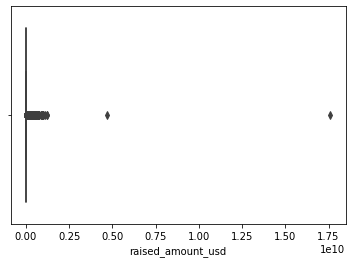

In [47]:
sns.boxplot('raised_amount_usd', data = mf_venture)

**Top 9 contries which invested heavily in past**

In [48]:
top_9=mf_venture.groupby('country_code').sum().sort_values(by='raised_amount_usd',ascending=False).head(9).head(9)/1000000
top_9

,raised_amount_usd
country_code,
USA,422510.71
CHN,39835.42
GBR,20245.62
IND,14391.86
CAN,9583.32
FRA,7259.54
ISR,6907.51
DEU,6346.96
JPN,3363.68


In [49]:
countries = (mf_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9))/1000000
countries

country_code
USA   422510.71
CHN    39835.42
GBR    20245.62
IND    14391.86
CAN     9583.32
FRA     7259.54
ISR     6907.51
DEU     6346.96
JPN     3363.68
Name: raised_amount_usd, dtype: float64

In [50]:
top9=top_9.index.values.tolist()
print(top9)
top_9_countries= mf_venture[mf_venture['country_code'].isin(top9)]
top_9_countries.shape

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']


(44307, 16)

In [51]:
top3=mf_venture[mf_venture['country_code'].isin(['USA','GBR','IND'])]
top3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.00,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.00,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.00,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN


In [52]:
top3['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [53]:
##mf_venture[mf_venture['country_code']=='IND']['raised_amount_usd'].sum()

In [54]:
##mf_venture[mf_venture['country_code']=='IND']['raised_amount_usd'].describe()

As from our data analysis and wikipedia top 3 Engish speaking countries are:
1. USA
2. GBR (United Kingdom)
3. IND

*(Note:we have no data about China on wikipedia so we can't say that china is English speaking country)*



- Top English speaking country:    USA

- Second English speaking country: GBR

- Third English speaking country:  IND

# 

**Now we have to do Sector analysis:**


for this we have understand the distribution of investments across the eight 
main sectors. (Note that we are interested in the eight 'main sectors' provided in 
the mapping file. The two files — companies and rounds2 — have numerous 
sub-sector names; hence, we will need to map each sub-sector to its main 
sector.)

In [55]:
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [56]:
mf_venture['category_list']=mf_venture['category_list'].astype('str').apply(lambda x:x.split('|')[0])
mf_venture

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.00,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [57]:
mapp=mapping
mapp['category_list']=mapp['category_list'].str.replace('0','na')

-  Checking that we have successfully replace '0' with 'na' in mapp file  

In [58]:
mapp[mapp['category_list']=='A0lytics']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [59]:
mapp[mapp['category_list']=='Big Data A0lytics']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [60]:
mapp[mapp['category_list']=='Event Ma0gement']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


# 

In [61]:
category=pd.DataFrame(mapping,columns=['category_list'])
category

,category_list
0,NaN
1,3D
2,3D Printing
3,3D Technology
4,Accounting
...,...
683,Wholesale
684,Wine And Spirits
685,Wireless
686,Women


In [62]:
mapp.shape

(688, 10)

In [63]:
mapp.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [64]:
range(0,mapping.shape[0])

range(0, 688)

In [65]:
mf_venture

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.00,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [66]:
for i in mapp.columns:
    for j in range(0,mapping.shape[0]):
        if mapping[i][j]==1:
            mavp=mapping['category_list'][j]
           # mf_venture.loc[mf_venture['category_list']==mavp,'Mapping']=i 
            category.loc[category['category_list']==mavp,'Mapping']=i

In [67]:
category.rename({'category_list': 'primary_sector', 'Mapping': 'main_sector'}, axis=1, inplace=True)
category

,primary_sector,main_sector
0,NaN,NaN
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


In [68]:
mf_venture[mf_venture['category_list']=='Event Management'].head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
9954,/organization/b-there-com,/funding-round/0ee3c52ea918dc10f05af73ef4f4d655,venture,NaN,22-03-2001,6500000.00,/organization/b-there-com,b-there.com,http://www.b-there.com/,Event Management,operating,USA,CT,Hartford,Westport,NaN


In [69]:
mf_venture[mf_venture['category_list']=='Analytics'].head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [70]:
mf_venture.rename({'category_list': 'primary_sector', 'Mapping': 'main_sector'}, axis=1, inplace=True)
mf_venture

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.00,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [71]:
mf_venture.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         22119
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2603
primary_sector                 0
status                         0
country_code                2105
state_code                  2848
region                      2699
city                        2699
founded_at                  9620
dtype: int64

In [72]:
mf_final = pd.merge(mf_venture, category, how='inner', left_on=['primary_sector'], right_on=['primary_sector'])

In [73]:
mf_final

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49428,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,/organization/yapta,yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others
49429,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,/organization/yapta,yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others
49430,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,NaN,01-07-2007,7227332.00,/organization/yunnan-landsun-green-industry-gr...,yunnan landsun green industry (group),http://www.lstea.tech-food.com/,Tea,operating,CHN,29,CHN - Other,Simao,01-05-1996,Others
49431,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.00,/organization/ziftit,ziftit,http://www.ziftit.com,Gift Registries,closed,USA,CA,San Diego,San Diego,01-02-2011,Others


In [74]:
mf_final['raised_amount_usd_mils'] = round((mf_final['raised_amount_usd']/1000000),2)
mf_final

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,raised_amount_usd_mils
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,10.00
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,15.00
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,5.80
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,18.00
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49428,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,/organization/yapta,yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others,2.00
49429,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,/organization/yapta,yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others,1.79
49430,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,NaN,01-07-2007,7227332.00,/organization/yunnan-landsun-green-industry-gr...,yunnan landsun green industry (group),http://www.lstea.tech-food.com/,Tea,operating,CHN,29,CHN - Other,Simao,01-05-1996,Others,7.23
49431,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.00,/organization/ziftit,ziftit,http://www.ziftit.com,Gift Registries,closed,USA,CA,San Diego,San Diego,01-02-2011,Others,4.00


In [75]:
#mf_final['raised_amount_usd_mils'] = (mf_final['raised_amount_usd']/1000000)
#mf_final

In [76]:
mf_final['raised_amount_usd'].isnull().sum()

0

In [77]:
mf_final.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         21803
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2432
primary_sector                 0
status                         0
country_code                1901
state_code                  2630
region                      2488
city                        2488
founded_at                  9200
main_sector                    0
raised_amount_usd_mils         0
dtype: int64

In [78]:
mf_final['country_code'].value_counts()

USA    35724
GBR     2031
CHN     1547
CAN     1242
FRA      911
       ...  
MMR        1
SEN        1
MAR        1
MUS        1
MNE        1
Name: country_code, Length: 97, dtype: int64

In [79]:
mf_final=mf_final[mf_final['raised_amount_usd_mils'].between(5.0,15.0,inclusive=True)]

In [80]:
mf_final

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,raised_amount_usd_mils
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,10.00
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,15.00
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,5.80
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment,5.00
11,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.00,/organization/basel-switzerland,the speedel group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,Entertainment,13.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49419,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8250000.00,/organization/user-interface,user interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,Others,8.25
49420,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,NaN,25-11-2015,5000000.00,/organization/vector-watch,vector watch,http://www.vectorwatch.com/,Watch,operating,GBR,H9,London,London,01-01-2013,Others,5.00
49421,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10500000.00,/organization/washio,washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Others,10.50
49425,/organization/yapta,/funding-round/2bef2981d0db9747630882cc91e42ba5,venture,NaN,20-07-2011,5000000.00,/organization/yapta,yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others,5.00


In [81]:
mf_final.shape

(16369, 18)

In [82]:
mf_final['raised_amount_usd_mils'].value_counts()

10.00    1817
5.00     1724
15.00    1087
6.00      987
8.00      868
         ... 
11.64       1
14.46       1
12.84       1
12.42       1
6.46        1
Name: raised_amount_usd_mils, Length: 882, dtype: int64

In [83]:
mf_final.funding_round_type.value_counts() 

venture    16369
Name: funding_round_type, dtype: int64

In [84]:
D1=mf_final[mf_final['country_code']=='USA']

In [85]:
D2=mf_final[mf_final['country_code']=='GBR']

In [86]:
D3=mf_final[mf_final['country_code']=='IND']

In [87]:
D1.shape

(12044, 18)

In [88]:
D2.shape

(620, 18)

In [89]:
D3.shape

(328, 18)


# 

**we add columns of investment counts in main sector and total amount raised in million dollars.**

In [90]:
D1 = D1.assign(invest_count_main_sect =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(total_invest_milUSD =D1.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

D2 = D2.assign(invest_count_main_sect =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(total_invest_milUSD =D2.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

D3 = D3.assign(invest_count_main_sect =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(total_invest_milUSD =D3.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

In [91]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,raised_amount_usd_mils,invest_count_main_sect,total_invest_milUSD
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment,5.00,591,5099.21
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Entertainment,5.00,591,5099.21
24,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment,5.00,591,5099.21
25,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment,5.00,591,5099.21
33,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,/organization/matchmine,matchmine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,Entertainment,10.00,591,5099.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49410,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,B,01-01-2008,5000000.00,/organization/thisnext,thisnext,http://www.thisnext.com,Social Buying,operating,USA,CA,Los Angeles,Santa Monica,01-12-2005,"Social, Finance, Analytics, Advertising",5.00,2718,23837.38
49413,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,A,18-09-2013,5000000.00,/organization/thredhq,thredhq,https://thredhq.com/,Social + Mobile + Local,operating,USA,CA,SF Bay Area,Berkeley,01-01-2012,"Social, Finance, Analytics, Advertising",5.00,2718,23837.38
49419,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8250000.00,/organization/user-interface,user interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,Others,8.25,2958,26381.01
49421,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10500000.00,/organization/washio,washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Others,10.50,2958,26381.01


In [92]:
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,raised_amount_usd_mils,invest_count_main_sect,total_invest_milUSD
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,15.00,56,482.79
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment,5.80,56,482.79
219,/organization/flypay,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,A,16-07-2015,10700000.00,/organization/flypay,flypay,http://www.flypay.co.uk,Apps,operating,GBR,H9,London,London,26-02-2013,"News, Search and Messaging",10.70,73,615.75
291,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,NaN,17-04-2013,15000000.00,/organization/kaazing,kaazing,http://www.kaazing.com,Apps,operating,GBR,H9,London,London,01-05-2007,"News, Search and Messaging",15.00,73,615.75
336,/organization/mindshapes,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,A,01-11-2011,5000000.00,/organization/mindshapes,mindshapes,http://mindshapes.com,Apps,operating,GBR,H9,London,London,01-01-2010,"News, Search and Messaging",5.00,73,615.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49077,/organization/zoopla,/funding-round/0ec759962079a8997eb1632d6c1a769b,venture,NaN,23-12-2010,5005659.00,/organization/zoopla,zoopla,http://www.zoopla.co.uk,Property Management,ipo,GBR,H9,London,London,01-06-2007,"Social, Finance, Analytics, Advertising",5.01,133,1089.39
49078,/organization/zoopla,/funding-round/98da1f441a55c9a9629a256828923e38,venture,B,19-01-2009,5440000.00,/organization/zoopla,zoopla,http://www.zoopla.co.uk,Property Management,ipo,GBR,H9,London,London,01-06-2007,"Social, Finance, Analytics, Advertising",5.44,133,1089.39
49195,/organization/perpetuum,/funding-round/e26492fb6eddf9086f93362265460739,venture,NaN,12-10-2007,10181710.00,/organization/perpetuum,perpetuum,http://www.perpetuum.com/,Wireless,operating,GBR,M4,London,Southampton,01-01-2004,Entertainment,10.18,56,482.79
49364,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,A,15-04-2015,10000000.00,/organization/yoyo,yoyo wallet,http://www.yoyowallet.com,Loyalty Programs,operating,GBR,H9,London,London,01-05-2013,Others,10.00,148,1298.65


In [93]:
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,raised_amount_usd_mils,invest_count_main_sect,total_invest_milUSD
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,10.00,33,280.83
154,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.00,/organization/chillr-2,chillr,http://chillr.in,Apps,operating,IND,13,Cochin,Cochin,22-12-2013,"News, Search and Messaging",6.00,52,433.84
287,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.00,/organization/jugnoo,jugnoo,https://jugnoo.in/#/,Apps,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,"News, Search and Messaging",5.00,52,433.84
387,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.00,/organization/peppertap,peppertap,http://www.peppertap.com,Apps,operating,IND,10,New Delhi,Gurgaon,26-11-2014,"News, Search and Messaging",10.00,52,433.84
525,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.00,/organization/tinyowl-technology,tinyowl technology,http://tinyowl.com/,Apps,operating,IND,16,Mumbai,Mumbai,NaN,"News, Search and Messaging",7.67,52,433.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,/organization/easylink,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,NaN,13-04-2006,5400000.00,/organization/easylink,easylink,http://www.xlweb.com,Web Design,ipo,IND,25,Chennai,Chennai,14-04-1995,"News, Search and Messaging",5.40,52,433.84
48914,/organization/livspace,/funding-round/8c6fdd230ae9e06797e722d678f47474,venture,A,11-08-2015,8000000.00,/organization/livspace,livspace,http://www.livspace.com/,Interior Design,operating,IND,19,Bangalore,Bangalore,01-01-2012,Entertainment,8.00,33,280.83
48978,/organization/razorpay,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,A,27-10-2015,9000000.00,/organization/razorpay,razorpay,https://razorpay.com/,FinTech,operating,IND,19,Bangalore,Bangalore,01-01-2013,"Social, Finance, Analytics, Advertising",9.00,60,550.55
49116,/organization/holidayiq-com,/funding-round/c402dcbdd413b7ea344a5681a4428645,venture,B,20-07-2015,15000000.00,/organization/holidayiq-com,holidayiq,http://www.holidayiq.com,Resorts,operating,IND,19,Bangalore,Bangalore,01-01-2004,Entertainment,15.00,33,280.83


**Total number of Investments (count) for  English speaking  country 1 (USA)**

In [94]:
D1.shape[0]

12044

**Total number of Investments (count) for  English speaking  country 2 (GBR)**

In [95]:
D2.shape[0]

620

**Total number of Investments (count) for  English speaking  country 3 or D3 (IND)**

In [96]:
D3.shape[0]

328

**Total amount of investment (USD) in each three top english speaking country**

In [97]:
print('USA', round(D1['raised_amount_usd_mils'].sum(), 2))
print('GBR', round(D2['raised_amount_usd_mils'].sum(),2))
print('IND', round(D3['raised_amount_usd_mils'].sum(),2))

USA 107578.4
GBR 5380.22
IND 2949.55


In [98]:
#D1.groupby('main_sector')['raised_amount_usd'].sum()

**We will find top three sectors of investments in each countries.**

In [99]:
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     2958
Social, Finance, Analytics, Advertising    2718
Cleantech / Semiconductors                 2305
Name: main_sector, dtype: int64

**Result:**

In D1 or Country 1 (USA):
- The Top Sector name (no. of investment-wise): Others
- The Second Sector name (no. of investment-wise): Social, Finance, Analytics, Advertising
- The Third Sector name (no. of investment-wise):Cleantech / Semiconductors 

In [100]:
D2.groupby('main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     148
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
Name: main_sector, dtype: int64

**Result:**

In D2 or Country 2 (GBR):
- The Top Sector name (no. of investment-wise): Others
- The Second Sector name (no. of investment-wise): Social, Finance, Analytics, Advertising
- The Third Sector name (no. of investment-wise): Cleantech / Semiconductors

In [101]:
D3.groupby('main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64

**Result:**

In D3 or Country 3 (IND):
- The Top Sector name (no. of investment-wise): Others
- The Second Sector name (no. of investment-wise): Social, Finance, Analytics, Advertising
- The Third Sector name (no. of investment-wise): News, Search and Messaging

**Number of investments in top 3 sector in English speaking  country 1 or D1 (USA)**

In [102]:
print("Others:", D1[D1['main_sector'] == 'Others'].shape[0])
print("Social, Finance, Analytics, Advertising:", D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
print("Cleantech / Semiconductors:", D1[D1['main_sector'] == 'Cleantech / Semiconductors'].shape[0])

Others: 2958
Social, Finance, Analytics, Advertising: 2718
Cleantech / Semiconductors: 2305


**Number of investments in top 3 sector in English speaking  country 2 or D2 (GBR)**

In [103]:
print("Others:", D2[D2['main_sector'] == 'Others'].shape[0])
print("Social, Finance, Analytics, Advertising:", D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
print("Cleantech / Semiconductors:", D2[D2['main_sector'] == 'Cleantech / Semiconductors'].shape[0])

Others: 148
Social, Finance, Analytics, Advertising: 133
Cleantech / Semiconductors: 128


**Number of investments in top 3 sector in English speaking  country 3 or D3 (IND)**

In [104]:
print("Others:",D3[D3['main_sector'] == 'Others'].shape[0])
print("Social, Finance, Analytics, Advertising:", D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
print("News, Search and Messaging:", D3[D3['main_sector'] == 'News, Search and Messaging'].shape[0])

Others: 110
Social, Finance, Analytics, Advertising: 60
News, Search and Messaging: 52


**For point 3 (top sector count-wise), which company received the highest investment? in English speaking  country 1 or D1 (USA)**

In [105]:
print("USA:",D1[D1['main_sector']=='Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])

USA: decisyon


**For point 3 (top sector count-wise), which company received the highest investment? in English speaking  country 2 or D2 (GBR)**

In [106]:
print("GBR:",D2[D2['main_sector']=='Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])

GBR: notonthehighstreet


**For point 3 (top sector count-wise), which company received the highest investment? in English speaking  country 3 or D3 (IND)**


In [107]:
print('IND:',D3[D3['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])

IND: commonfloor


# 

**For point 4 (second best sector count-wise), which company received the highest investment? in English speaking country 1 or D1 (USA)**

In [108]:
print('USA:',D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])

USA: three stage media


**For point 4 (second best sector count-wise), which company received the highest investment? in English speaking country 2 or D2 (GBR)**

In [109]:
print('GBR:',D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])

GBR: mythings


**For point 4 (second best sector count-wise), which company received the highest investment? in English speaking country 3 or D3 (IND)**


In [110]:
print('IND:',D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])

IND: shiram credit


# 

**Now this is a final step we have to plot graphs to understand analysis outcomes**

 As a final step, we have to present our findings to the CEO of Spark Funds. Specifically, CEO wants to see the following plots: 



• A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amountof investment in each funding type. This chart should make it clear that a certain 
funding type (FT) is best suited for Spark Funds. 



• A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 



• A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [111]:
mf

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114075,/organization/zeta-interactive,/funding-round/e07bcbc4e6a949f95f0c7e802b6dad02,private_equity,NaN,27-06-2012,70000000.00,/organization/zeta-interactive,zeta interactive,http://www.zetainteractive.com,Advertising,operating,USA,NY,New York City,New York,01-01-2007
114275,/organization/zimride,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,NaN,30-01-2013,15000000.00,/organization/zimride,zimride,http://zimride.com,Public Transportation,acquired,USA,CA,SF Bay Area,San Francisco,NaN
114406,/organization/ziptel,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,NaN,10-11-2014,4319243.00,/organization/ziptel,ziptel,http://ziptel.com.au,Communications Hardware|Telecommunications|Wir...,ipo,AUS,8,Perth,Subiaco,NaN
114882,/organization/zyme-solutions,/funding-round/b2cfedffee4860384ce7293a6e8db5da,private_equity,NaN,20-05-2013,5000000.00,/organization/zyme-solutions,zyme solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004


In [112]:
mf['raised_amount_usd_mil'] = mf['raised_amount_usd']/1000000
mf.groupby('funding_round_type')['raised_amount_usd_mil'].sum()

funding_round_type
angel              4659.05
private_equity   141925.39
seed              16988.35
venture          590125.98
Name: raised_amount_usd_mil, dtype: float64

In [113]:
mf

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,(the) one of theminc.,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3.41
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.00
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.72
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114075,/organization/zeta-interactive,/funding-round/e07bcbc4e6a949f95f0c7e802b6dad02,private_equity,NaN,27-06-2012,70000000.00,/organization/zeta-interactive,zeta interactive,http://www.zetainteractive.com,Advertising,operating,USA,NY,New York City,New York,01-01-2007,70.00
114275,/organization/zimride,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,NaN,30-01-2013,15000000.00,/organization/zimride,zimride,http://zimride.com,Public Transportation,acquired,USA,CA,SF Bay Area,San Francisco,NaN,15.00
114406,/organization/ziptel,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,NaN,10-11-2014,4319243.00,/organization/ziptel,ziptel,http://ziptel.com.au,Communications Hardware|Telecommunications|Wir...,ipo,AUS,8,Perth,Subiaco,NaN,4.32
114882,/organization/zyme-solutions,/funding-round/b2cfedffee4860384ce7293a6e8db5da,private_equity,NaN,20-05-2013,5000000.00,/organization/zyme-solutions,zyme solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004,5.00


In [114]:
Investments_mean = round(mf.groupby('funding_round_type')['raised_amount_usd_mil'].mean(),2)
investement = mf.groupby('funding_round_type')['raised_amount_usd_mil'].sum()
Invastement_fraction = round(investement/investement.sum(),2)*100
investement_metrics = pd.DataFrame(dict(investement_mean = Investments_mean, Invastement_fraction = Invastement_fraction))

In [115]:
investement_metrics.head()

,investement_mean,Invastement_fraction
funding_round_type,,
angel,0.97,1.00
private_equity,73.80,19.00
seed,0.73,2.00
venture,11.77,78.00


In [116]:
sns.set_context('poster',font_scale=0.8)
sns.color_palette("rocket", as_cmap=True)

Text(0.5, 0, 'Investement Type Analysis')

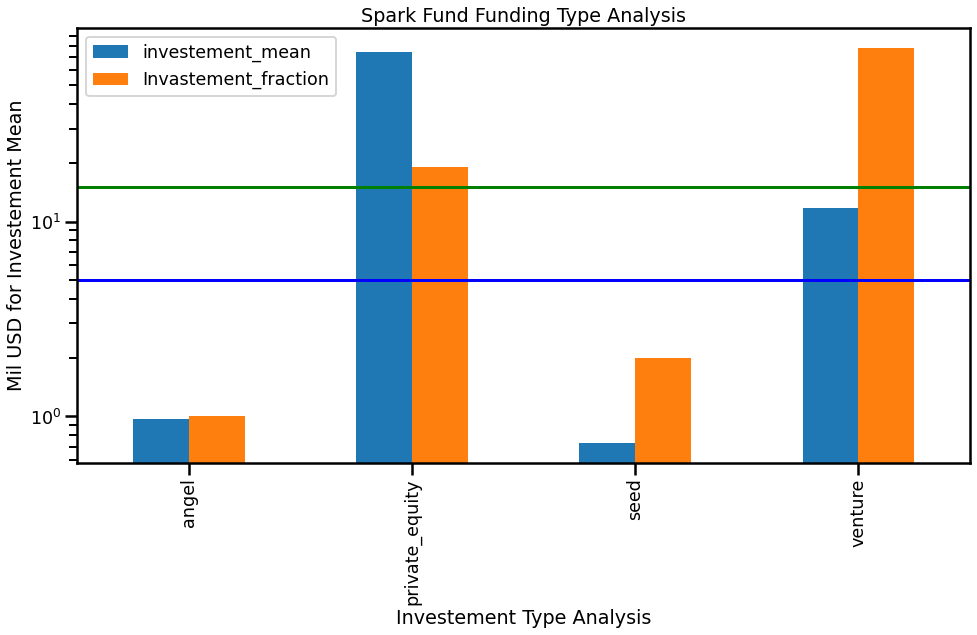

In [117]:
ax = investement_metrics.plot.bar(figsize=(16,8) )

plt.axhline(5, color='blue') # Investement limits of Spark Fund
plt.axhline(15, color='green')
plt.yscale('log')
ax.legend(loc = 2)
ax.set_title('Spark Fund Funding Type Analysis')
ax.set_ylabel('Mil USD for Investement Mean')
ax.set_xlabel('Investement Type Analysis')

([<matplotlib.patches.Wedge at 0x26980bc4460>,
 [Text(1.099457216426567, 0.03455183421390152, 'angel'),
  Text(0.8691705196099397, 0.6741977512874006, 'private_equity'),
  Text(0.27355889483456813, 1.0654414723751322, 'seed'),
  Text(-0.8475646435332076, -0.7011662962753037, 'venture')],
 [Text(0.5997039362326729, 0.01884645502576446, '1.00%'),
  Text(0.4740930106963307, 0.3677442279749457, '19.00%'),
  Text(0.14921394263703713, 0.5811498940227994, '2.00%'),
  Text(-0.46230798738174955, -0.38245434342289286, '78.00%')])

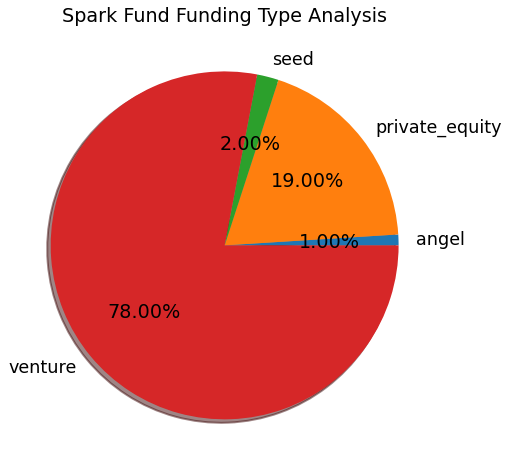

In [118]:
labels = 'angel', 'private_equity', 'seed', 'venture'
plt.figure(figsize=(8,8))
plt.title('Spark Fund Funding Type Analysis')
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(Invastement_fraction,  labels=labels,  autopct='%1.2f%%', shadow=True)

In [119]:
indexInvestmentMatrix = investement_metrics.reset_index()

In [120]:
# Function to auto label individual bars of the bar chart
def autolabel_bars(x_bars):
    
    for x_bar in x_bars:
        height = x_bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(x_bar.get_x() + x_bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points of offset (vertical)
                    textcoords="offset points",
                    ha='center', va='bottom')

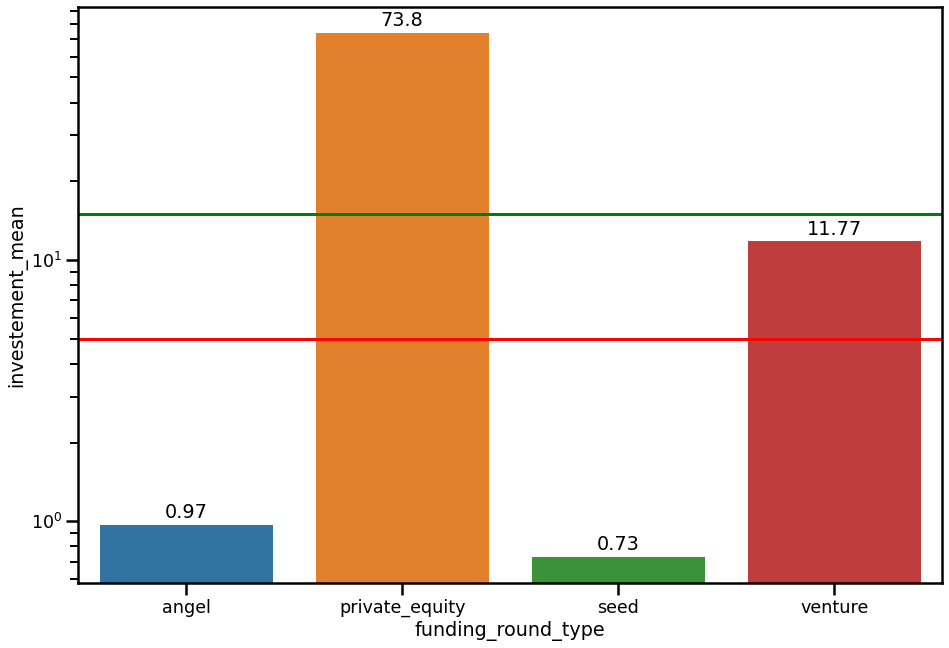

In [121]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

bar = ax.bar(indexInvestmentMatrix['funding_round_type'], indexInvestmentMatrix['investement_mean'])
 
plt.axhline(5, color='red') # Investement limits of Spark Fund
plt.axhline(15, color='green')
plt.yscale('log')
autolabel_bars(bar)
sns.barplot('funding_round_type', 'investement_mean', data = indexInvestmentMatrix)

**plot showing the top 9 countries against the total amount of investments of funding type**

Text(0.5, 1.0, 'Top 9 Country Analysis for Spark Funds Investements')

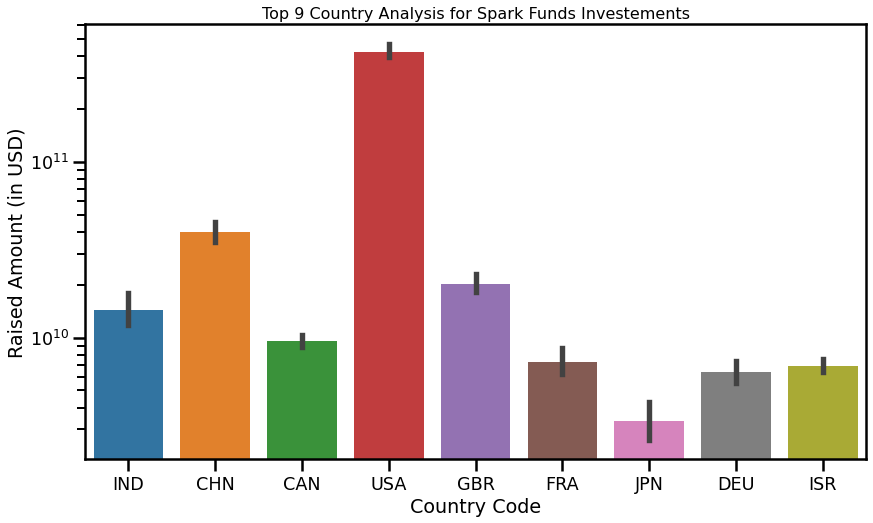

In [122]:
plt.figure(figsize=(14,8))
p=sns.barplot(x='country_code', y='raised_amount_usd', data=top_9_countries,estimator=np.sum)

p.set_yscale('log')
p.set(xlabel='Country Code', ylabel='Raised Amount (in USD)')
p.set_title('Top 9 Country Analysis for Spark Funds Investements',fontsize =16)

**A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart**

In [123]:
top3_master = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
top3_master = top3_master.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
top3_master = top3_master.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [124]:
top3_master.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,raised_amount_usd_mils,invest_count_main_sect,total_invest_milUSD
0,/organization/22nd-century-group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,NaN,18-09-2014,10000000.00,/organization/22nd-century-group,22nd century group,http://www.xxiicentury.com,Biotechnology,ipo,USA,NY,NY - Other,Clarence,01-01-1998,Cleantech / Semiconductors,10.00,2305,21251.65
1,/organization/23andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,C,07-01-2011,9000000.00,/organization/23andme,23andme,http://23andme.com,Biotechnology,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,Cleantech / Semiconductors,9.00,2305,21251.65
2,/organization/23andme,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,B,18-06-2009,12600000.00,/organization/23andme,23andme,http://23andme.com,Biotechnology,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,Cleantech / Semiconductors,12.60,2305,21251.65
3,/organization/23andme,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,A,03-10-2007,9000000.00,/organization/23andme,23andme,http://23andme.com,Biotechnology,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,Cleantech / Semiconductors,9.00,2305,21251.65
4,/organization/3-v-biosciences,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,NaN,17-03-2015,14278567.00,/organization/3-v-biosciences,3-v biosciences,http://www.3vbio.com,Biotechnology,operating,USA,CA,SF Bay Area,Menlo Park,01-03-2007,Cleantech / Semiconductors,14.28,2305,21251.65


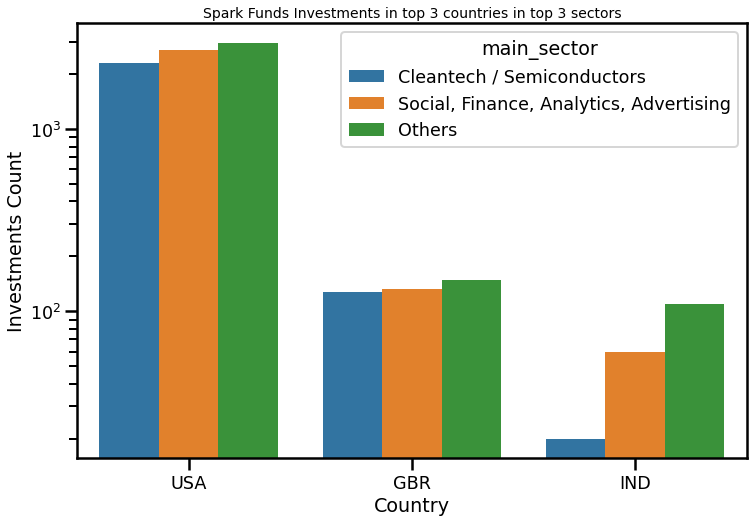

In [125]:
plt.figure(figsize= (12,8))

s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", 
              data=top3_master,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Investments Count')
s.set_title('Spark Funds Investments in top 3 countries in top 3 sectors',fontsize =14)

plt.yscale('log')

# Submitted by:-
#   Shubham Mehar B.Tech Electronics and Communication Engineering 2nd year, Ujjain Engineering College, AI Club

                    **Spark Funds Investement Analysis Completes here**

                                      **Thank You**